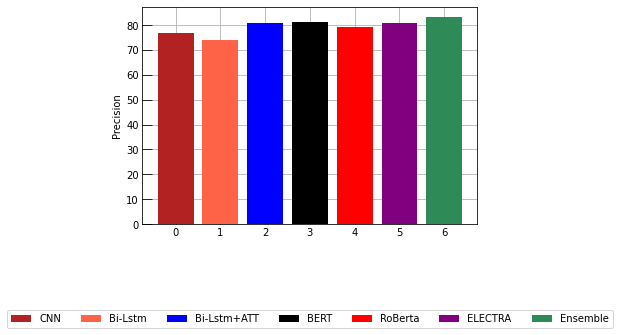

In [ ]:
import matplotlib

x1=0
x2=1
x3=2
x4=3
x5=4
x6=5
x7=6
y1=77
y2=74
y3=81
y4=81.29
y5=79.27
y6=80.95
y7=83.24
fig, ax = plt.subplots()
ax.bar(x1,y1, color=['firebrick'],label='CNN')
ax.bar(x2,y2, color=['tomato'],label='Bi-Lstm')
ax.bar(x3,y3, color=['blue'],label='Bi-Lstm+ATT')
ax.bar(x4,y4, color=['black'],label='BERT')
ax.bar(x5,y5, color=['red'],label='RoBerta')
ax.bar(x6,y6, color=['purple'],label='ELECTRA')
ax.bar(x7,y7, color=['seagreen'],label='Ensemble')

ax.set_ylabel("Precision")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol= 7)
ax.grid(True)
ax.tick_params(direction="in", length=10)
ax.set_axisbelow(True)  # This line added.
plt.show()

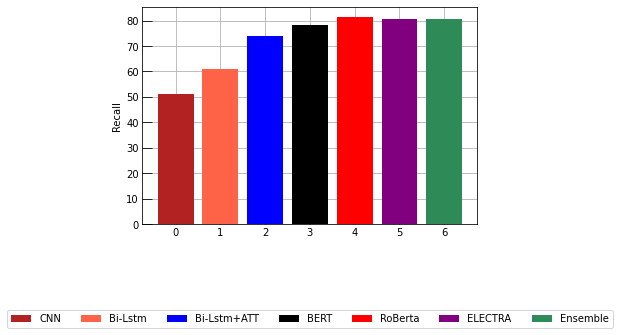

In [ ]:


x1=0
x2=1
x3=2
x4=3
x5=4
x6=5
x7=6
y1=51
y2=61
y3=74
y4=78.29
y5=81.41
y6=80.49
y7=80.57

fig, ax = plt.subplots()
ax.bar(x1,y1, color=['firebrick'],label='CNN')
ax.bar(x2,y2, color=['tomato'],label='Bi-Lstm')
ax.bar(x3,y3, color=['blue'],label='Bi-Lstm+ATT')
ax.bar(x4,y4, color=['black'],label='BERT')
ax.bar(x5,y5, color=['red'],label='RoBerta')
ax.bar(x6,y6, color=['purple'],label='ELECTRA')
ax.bar(x7,y7, color=['seagreen'],label='Ensemble')

ax.set_ylabel("Recall")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol= 7)
ax.grid(True)
ax.tick_params(direction="in", length=10)
ax.set_axisbelow(True)  # This line added.
plt.show()

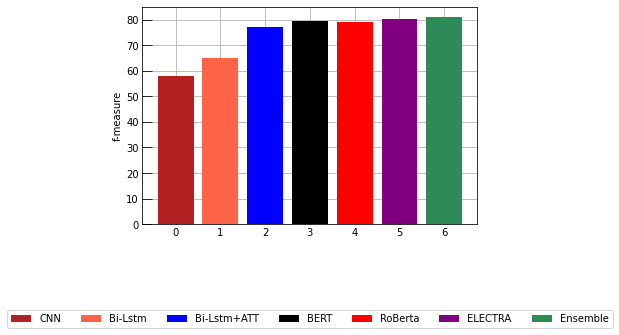

In [ ]:

x1=0
x2=1
x3=2
x4=3
x5=4
x6=5
x7=6
y1=58
y2=65
y3=77
y4=79.32
y5=79.29
y6=80.28
y7=81.07

fig, ax = plt.subplots()
ax.bar(x1,y1, color=['firebrick'],label='CNN')
ax.bar(x2,y2, color=['tomato'],label='Bi-Lstm')
ax.bar(x3,y3, color=['blue'],label='Bi-Lstm+ATT')
ax.bar(x4,y4, color=['black'],label='BERT')
ax.bar(x5,y5, color=['red'],label='RoBerta')
ax.bar(x6,y6, color=['purple'],label='ELECTRA')
ax.bar(x7,y7, color=['seagreen'],label='Ensemble')

ax.set_ylabel("f-measure")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol= 7)
ax.grid(True)
ax.tick_params(direction="in", length=10)
ax.set_axisbelow(True)  # This line added.
plt.show()

In [ ]:
from sklearn.metrics import f1_score
def main():

  robert_prediction = preds
  bert_prediction = preds1
  
  electra=preds2
  final_prediction = majority_voting(robert_prediction,
                                           bert_prediction,electra)
        # Compute accuracy
  print(final_prediction)
  print("ACCURACY:", accuracy_score(real, final_prediction))

        # Save model



  a=f1_score(real, final_prediction, average=None)
  test_prec = precision_score(real, final_prediction,average=None);
  test_rec = recall_score(real, final_prediction,average=None);
  print(a)
  print(test_prec)
  print(test_rec)
  return(final_prediction)

if __name__ == "__main__":
    final_prediction=main()

[0 0 2 ... 0 1 3]
ACCURACY: 0.9517144856543037
[0.97885835 0.846543   0.82649007 0.87898089 0.52287582]
[0.98030913 0.86254296 0.78987342 0.828      0.70175439]
[0.97741186 0.83112583 0.86666667 0.93665158 0.41666667]


In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib



def majority_voting(robert_prediction, bert_prediction,electra):

    final_prediction = list()
    for robert,bert,elec in zip(robert_prediction,
                                   bert_prediction,electra):
        # Keep track of votes per class
        false = advise = mechanism = effect = intt = 0

        # Loop over all models
        predictions = [robert,bert,elec]
        for prediction in predictions:
            # Voting
            if prediction == 0:
                false += 1
            elif prediction == 1:
                advise += 1
            elif prediction == 2:
                mechanism += 1
            elif prediction == 3:
                effect += 1
            elif prediction == 4:
                intt += 1

        # Find max vote
        count_dict = {'false': false, 'advise': advise, 'mechanism': mechanism, 'effect': effect, 'int': intt}
        highest = max(count_dict.values())
        max_values = [k for k, v in count_dict.items() if v == highest]
        ensemble_prediction = []
        for max_value in max_values:
            if max_value == 'false':
                ensemble_prediction.append('false')
            elif max_value == 'advise':
                ensemble_prediction.append('advise')
            elif max_value == 'mechanism':
                ensemble_prediction.append('mechanism')
            elif max_value == 'effect':
                ensemble_prediction.append('effect')
            elif max_value == 'int':
                ensemble_prediction.append('int')

        predict = ''

        predict = ensemble_prediction[0]

        # Store max vote
        final_prediction.append(predict)
    a=[]
    for i in range(0,len(final_prediction)):
      if final_prediction[i]=='false':
        a.append(0)
      elif final_prediction[i]=='advise':
        a.append(1)
      elif final_prediction[i]=='mechanism':
        a.append(2)
      elif final_prediction[i]=='effect':
        a.append(3)
      elif final_prediction[i]=='int':
        a.append(4)
    return np.array(a)

In [ ]:
preds2 = np.concatenate(ret2[0]);
real2 = np.concatenate(ret2[1]);

print('test predictions: {}'.format(preds2));
print('real values: {}'.format(real2));

test_acc = accuracy_score(real2, preds2);
test_prec = precision_score(real2, preds2,average=None);
test_rec = recall_score(real2, preds2,average=None);
test_f1 = f1_score(real2, preds2,average=None);

print('test accuracy: {}'.format(test_acc));
print('test precision: {}'.format(test_prec));
print('test recall: {}'.format(test_rec));
print('test f1: {}'.format(test_f1));

test predictions: [0 0 2 ... 0 1 3]
real values: [0 0 2 ... 0 1 0]
test accuracy: 0.9503149055283415
test precision: [0.98131635 0.87279152 0.78411911 0.82142857 0.58823529]
test recall: [0.97572303 0.81788079 0.87777778 0.93665158 0.41666667]
test f1: [0.9785117  0.84444444 0.82830931 0.87526427 0.48780488]


In [ ]:
preds1 = np.concatenate(ret1[0]);
real1 = np.concatenate(ret1[1]);

print('test predictions: {}'.format(preds1));
print('real values: {}'.format(real1));

test_acc = accuracy_score(real1, preds1);
test_prec = precision_score(real1, preds1,average=None);
test_rec = recall_score(real1, preds1,average=None);
test_f1 = f1_score(real1, preds1,average=None);

print('test accuracy: {}'.format(test_acc));
print('test precision: {}'.format(test_prec));
print('test recall: {}'.format(test_rec));
print('test f1: {}'.format(test_f1));

test predictions: [0 0 2 ... 0 1 3]
real values: [0 0 2 ... 0 1 0]
test accuracy: 0.9457662701189643
test precision: [0.97494737 0.85873606 0.7735369  0.83613445 0.62121212]
test recall: [0.97762297 0.76490066 0.84444444 0.90045249 0.42708333]
test f1: [0.97628334 0.80910683 0.80743692 0.8671024  0.50617284]


In [ ]:
preds = np.concatenate(ret[0]);
real = np.concatenate(ret[1]);

print('test predictions: {}'.format(preds));
print('real values: {}'.format(real));

test_acc = accuracy_score(real, preds);
test_prec = precision_score(real, preds,average=None);
test_rec = recall_score(real, preds,average=None);
test_f1 = f1_score(real, preds,average=None);

print('test accuracy: {}'.format(test_acc));
print('test precision: {}'.format(test_prec));
print('test recall: {}'.format(test_rec));
print('test f1: {}'.format(test_f1));

test predictions: [0 0 2 ... 0 0 0]
real values: [0 0 2 ... 0 1 0]
test accuracy: 0.9350944716585025
test precision: [0.98134085 0.72853186 0.73522459 0.77272727 0.74576271]
test recall: [0.95482373 0.87086093 0.86388889 0.92307692 0.45833333]
test f1: [0.96790071 0.7933635  0.79438059 0.84123711 0.56774194]


In [ ]:
ret = test_DDI_model(model, test_data);#roberta
ret1 = test_DDI_model1(model1, test_dataa);#biovert
ret2 = test_DDI_model3(model2, test_dataaa);#bioelectra


finished batch 0
finished batch 1
finished batch 2
finished batch 3
finished batch 4
finished batch 5
finished batch 6
finished batch 7
finished batch 8
finished batch 9
finished batch 10
finished batch 11
finished batch 12
finished batch 13
finished batch 14
finished batch 15
finished batch 16
finished batch 17
finished batch 18
finished batch 19
finished batch 20
finished batch 21
finished batch 22
finished batch 23
finished batch 24
finished batch 25
finished batch 26
finished batch 27
finished batch 28
finished batch 29
finished batch 30
finished batch 31
finished batch 32
finished batch 33
finished batch 34
finished batch 35
finished batch 36
finished batch 37
finished batch 38
finished batch 39
finished batch 40
finished batch 41
finished batch 42
finished batch 43
finished batch 44
finished batch 45
finished batch 46
finished batch 47
finished batch 48
finished batch 49
finished batch 50
finished batch 51
finished batch 52
finished batch 53
finished batch 54
finished batch 55
fi

In [ ]:

# load test_accumulated.tsv file
avg_test_accuracy = 0;

test_data = load_and_process_DDI_test_data('all_data_test_data.txt','test', tokenizer=tokenizer);
test_dataa = load_and_process_DDI_test_data('all_data_test_data.txt','test', tokenizer=tokenizer1);
test_dataaa = load_and_process_DDI_test_data('all_data_test_data.txt','test', tokenizer=tokenizer2);


Streaming output truncated to the last 5000 lines.
0
0
0
0
0
0
2
2
2
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
1
1
1
0
0
0
3
0
0
0
0
2
0
0
2
3
0
0
1
0
0
3
0
0
1
0
0
3
0
0
1
3
0
0
1
0
0
3
0
0
2
0
0
1
3
3
0
0
2
1
0
0
3
0
0
1
0
0
2
3
0
0
2
3
0
0
0
1
0
0
2
0
0
3
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
2
3
2
2
0
1
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
0
3
0
0
3
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
3
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
2
2
0
0
0
2
2
0
2
0
1
1
0
0
4
4
4
4
4
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
3
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
2
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
3
0
0
0
0
3
0
0
0
0
0
0
3
3
3
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3

In [ ]:

def test_DDI_model3(model, data, batch_size=12):
    model.load_state_dict(torch.load('bioelectra-base-discriminator-pubmed.pt'));

    model.eval();

    ds = data;

    test_dataloader = DataLoader(
        ds,
        sampler=SequentialSampler(ds),
        batch_size=batch_size,
    );

    preds_list, real_labels_list = [], [];

    for batch_nbr, batch in enumerate(test_dataloader):
        b_input_ids = batch[0].to(device2);
        b_input_mask = batch[1].to(device2);
        b_labels = batch[2].to(device2);

        with torch.no_grad():
            output = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask
            );
        loss = output.loss;
        preds = torch.argmax(output.logits, dim=1).flatten()
        logits = preds.detach().cpu().numpy();
        label_ids = b_labels.to('cpu').numpy();
        

        preds_list.append(logits);
        real_labels_list.append(label_ids);

        print('finished batch {}'.format(batch_nbr));

    ret = (
        preds_list,
        real_labels_list
    );
    
    return ret;

In [ ]:

def test_DDI_model1(model, data, batch_size=12):
    model.load_state_dict(torch.load('biobert.pt'));

    model.eval();

    ds = data;

    test_dataloader = DataLoader(
        ds,
        sampler=SequentialSampler(ds),
        batch_size=batch_size,
    );

    preds_list, real_labels_list = [], [];

    for batch_nbr, batch in enumerate(test_dataloader):
        b_input_ids = batch[0].to(device1);
        b_input_mask = batch[1].to(device1);
        b_labels = batch[2].to(device1);

        with torch.no_grad():
            output = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask
            );
        loss = output.loss;
        preds = torch.argmax(output.logits, dim=1).flatten()
        logits = preds.detach().cpu().numpy();
        label_ids = b_labels.to('cpu').numpy();
        

        preds_list.append(logits);
        real_labels_list.append(label_ids);

        print('finished batch {}'.format(batch_nbr));

    ret = (
        preds_list,
        real_labels_list
    );
    
    return ret;

In [ ]:

def test_DDI_model(model, data, batch_size=12):
    model.load_state_dict(torch.load('biomed_roberta_base.pt'));

    model.eval();

    ds = data;

    test_dataloader = DataLoader(
        ds,
        sampler=SequentialSampler(ds),
        batch_size=batch_size,
    );

    preds_list, real_labels_list = [], [];

    for batch_nbr, batch in enumerate(test_dataloader):
        b_input_ids = batch[0].to(device);
        b_input_mask = batch[1].to(device);
        b_labels = batch[2].to(device);

        with torch.no_grad():
            output = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask
            );
        loss = output.loss;
        preds = torch.argmax(output.logits, dim=1).flatten()
        logits = preds.detach().cpu().numpy();
        label_ids = b_labels.to('cpu').numpy();
        

        preds_list.append(logits);
        real_labels_list.append(label_ids);

        print('finished batch {}'.format(batch_nbr));

    ret = (
        preds_list,
        real_labels_list
    );
    
    return ret;

In [ ]:
from IPython.display import display;
def load_and_process_DDI_test_data(filepath,set_type, tokenizer, maxlen=512):
    
    relation_labels=['false', 'mechanism', 'effect', 'advise', 'int']
    print( "Input File Reading")
    fp = open(filepath, 'r')
    samples = fp.read().strip().split('\n\n')
    sent_lengths   = []		#1-d array
    sent_contents  = []		#2-d array [[w1,w2,....] ...]
    labels    = []		#1-d array
    entity1_list   = []		#2-d array [[e1,e1_t] [e1,e1_t]...]
    entity2_list   = []		#2-d array [[e1,e1_t] [e1,e1_t]...]
    examples = []
    i=0
    for sample in samples:
      guid = "%s-%s" % (set_type, i)
      sent, entities, relation = sample.strip().split('\n')

      e1, e1_t, e2, e2_t = entities.split('\t') 
      sent_contents.append(sent.lower())
      label = relation_labels.index(relation) 
      examples.append(InputExample(guid=guid, text_a=sent.lower(), label=label))
      entity1_list.append([e1, e1_t])
      entity2_list.append([e2, e2_t])
      print(label)
      labels.append(label)
      i = i+1



    input_ids = [];
    attention_masks = [];
    
    for sent in sent_contents:
        encoded_dict = tokenizer.encode_plus(
            sent,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        );

        input_ids.append(encoded_dict['input_ids']);
        attention_masks.append(encoded_dict['attention_mask']);

    # convert lists into tensors
    input_ids = torch.cat(input_ids, dim=0);
    attention_masks = torch.cat(attention_masks, dim=0);
    labels_tensor = torch.tensor(labels);

    dataset = TensorDataset(input_ids, attention_masks, labels_tensor);


    return dataset;

In [ ]:
def accuracy(preds, labels):

    return np.sum(preds == labels) / len(labels);

In [ ]:

data = load_and_process_DDI_train_data('all_data_train_data.txt','train' ,tokenizer=tokenizer, maxlen=128);

dataa = load_and_process_DDI_train_data('all_data_train_data.txt','train' ,tokenizer=tokenizer1, maxlen=128);

dataaa = load_and_process_DDI_train_data('all_data_train_data.txt','train' ,tokenizer=tokenizer2, maxlen=256);



Streaming output truncated to the last 5000 lines.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
0
0
4
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
3
0
0
0
0
0
0
2
0
0
0
0
0
0
3
0
2
2
3
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
3
0
0
1
1
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
1
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
0
0
1
1
0
0
0
0
2
0
0
0
0
0
1
0
1
0
0
0
0
0
3
0
2
2
2
2
0
2
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
3
3
3
0
2
2
2
0
0
0
3
3
0
0
0
0
2
2
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
1
0
1
1
1
0
0
0
0
0
0
3
0
0
0
3
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
2
2
0
0
2
2
0
2
2
2
2
0
0
0
0
2
2
0
0
2
2
0
2
2
2
2
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
2
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0

In [ ]:

tokenizer2 = ElectraTokenizer.from_pretrained('kamalkraj/bioelectra-base-discriminator-pubmed',do_lower_case=True)
model2 = ElectraForSequenceClassification.from_pretrained(
    'kamalkraj/bioelectra-base-discriminator-pubmed',
    num_labels=5,
    output_attentions=False,
    output_hidden_states=False
);

device2 = torch.device('cuda');
model2.cuda();

epochs = 2;

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Some weights of the model checkpoint at kamalkraj/bioelectra-base-discriminator-pubmed were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at kamalkraj/bioelectra-base-discriminator-pubmed and are newly i

In [ ]:

tokenizer1 = BertTokenizer.from_pretrained('monologg/biobert_v1.1_pubmed');

model1 = BertForSequenceClassification.from_pretrained(
    'monologg/biobert_v1.1_pubmed',
    num_labels=5,
    output_attentions=False,
    output_hidden_states=False
);

device1 = torch.device('cuda');
model1.cuda();

epochs = 2;

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at monologg/biobert_v1.1_pubmed were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:

#tokenizer = RobertaTokenizer.from_pretrained('simonlevine/bioclinical-roberta-long');
tokenizer = RobertaTokenizer.from_pretrained('simonlevine/biomed_roberta_base-4096')
model = RobertaForSequenceClassification.from_pretrained(
    'simonlevine/biomed_roberta_base-4096',
    num_labels=5,
    output_attentions=False,
    output_hidden_states=False
);

device = torch.device('cuda');
model.cuda();

epochs = 2;

Downloading:   0%|          | 0.00/567M [00:00<?, ?B/s]

Some weights of the model checkpoint at simonlevine/biomed_roberta_base-4096 were not used when initializing RobertaForSequenceClassification: ['roberta.encoder.layer.0.attention.self.value_global.weight', 'roberta.encoder.layer.6.attention.self.key_global.weight', 'lm_head.dense.bias', 'roberta.encoder.layer.8.attention.self.query_global.bias', 'roberta.encoder.layer.8.attention.self.value_global.weight', 'roberta.encoder.layer.10.attention.self.value_global.weight', 'roberta.encoder.layer.9.attention.self.query_global.bias', 'roberta.encoder.layer.0.attention.self.value_global.bias', 'roberta.encoder.layer.3.attention.self.key_global.weight', 'roberta.encoder.layer.4.attention.self.key_global.bias', 'roberta.encoder.layer.7.attention.self.key_global.bias', 'roberta.encoder.layer.3.attention.self.value_global.bias', 'roberta.encoder.layer.4.attention.self.value_global.bias', 'roberta.encoder.layer.6.attention.self.value_global.bias', 'roberta.encoder.layer.0.attention.self.key_global.

In [ ]:
def load_and_process_DDI_train_data(filepath,set_type, tokenizer, maxlen=512, train_percentage=0.7):
    # load dataset

    relation_labels=['false', 'mechanism', 'effect', 'advise', 'int']
    print( "Input File Reading")
    fp = open(filepath, 'r')
    samples = fp.read().strip().split('\n\n')
    sent_lengths   = []		#1-d array
    sent_contents  = []		#2-d array [[w1,w2,....] ...]
    labels    = []		#1-d array
    entity1_list   = []		#2-d array [[e1,e1_t] [e1,e1_t]...]
    entity2_list   = []		#2-d array [[e1,e1_t] [e1,e1_t]...]
    examples = []
    i=0
    for sample in samples:
      guid = "%s-%s" % (set_type, i)
      sent, entities, relation = sample.strip().split('\n')

      e1, e1_t, e2, e2_t = entities.split('\t') 
      sent_contents.append(sent.lower())
      label = relation_labels.index(relation) 
      examples.append(InputExample(guid=guid, text_a=sent.lower(), label=label))
      entity1_list.append([e1, e1_t])
      entity2_list.append([e2, e2_t])
      print(label)
      labels.append(label)
      i = i+1



    input_ids = [];
    attention_masks = [];
    
    for sent in sent_contents:
        encoded_dict = tokenizer.encode_plus(
            sent,
            add_special_tokens=True,
            max_length=maxlen,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        );

        input_ids.append(encoded_dict['input_ids']);
        attention_masks.append(encoded_dict['attention_mask']);
        

    # convert lists into tensors
    input_ids = torch.cat(input_ids, dim=0);
    attention_masks = torch.cat(attention_masks, dim=0);
    labels_tensor = torch.tensor(labels);

    dataset = TensorDataset(input_ids, attention_masks, labels_tensor);

    train_size = int(train_percentage * len(dataset));
    val_size = len(dataset) - train_size;

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size]);

    return (train_dataset, val_dataset);


In [ ]:
!pip install sentencepiece

!pip install transformers
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import numpy as np;
import pandas as pd;

import torch;

from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig;
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler;
from transformers import get_linear_schedule_with_warmup;

from transformers import (WEIGHTS_NAME, BertConfig, BertForSequenceClassification, BertTokenizer, BertModel, BertForTokenClassification,
                                  XLMConfig, XLMForSequenceClassification, XLMTokenizer, 
                                  XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer,
                                  RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer,
                                  AlbertConfig, AlbertForSequenceClassification, AlbertTokenizer, AlbertModel,AlbertForMaskedLM,
                                  AutoTokenizer, AutoModelForTokenClassification, AutoConfig,
                           XLMRobertaTokenizer,XLMRobertaForSequenceClassification,
                          RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer,
                          ElectraTokenizer,ElectraForSequenceClassification
                          )
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score;
from transformers import AlbertTokenizer, AlbertForSequenceClassification, AlbertConfig, AdamW, DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig


import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import gc
    
gc.collect()
import torch
torch.cuda.empty_cache()

import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

import os
import csv
import copy
import json
import logging

import torch
from torch.utils.data import TensorDataset


logger = logging.getLogger(__name__)

class InputExample(object):
    """
    A single training/test example for simple sequence classification.
    Args:
        guid: Unique id for the example.
        text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
        label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """

    def __init__(self, guid, text_a, label):
        self.guid = guid
        self.text_a = text_a
        self.label = label

    def __repr__(self):
        return str(self.to_json_string())

    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"


from transformers import BertTokenizer

# Load the BERT tokenizer

#tokenizer = RobertaTokenizer.from_pretrained('simonlevine/bioclinical-roberta-long')
tokenizer = RobertaTokenizer.from_pretrained('simonlevine/biomed_roberta_base-4096')

tokenizer1 = BertTokenizer.from_pretrained('monologg/biobert_v1.1_pubmed')


tokenizer2 = ElectraTokenizer.from_pretrained('kamalkraj/bioelectra-base-discriminator-pubmed',do_lower_case=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 4.9 MB/s 
     |████████████████████████████████| 596 kB 65.0 MB/s 
     |████████████████████████████████| 6.6 MB 55.7 MB/s 
     |████████████████████████████████| 86 kB 7.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
There are 1 GPU(s) available.
Device name: Tesla T4


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/703 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/220k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/
!ls


Mounted at /content/drive
/content/drive/My Drive
 albert-base-v2.pt			    model
 albert-large-v2.pt			    model_biobert.pt
 all_data_test_data.txt			    model_biobertt.pt
 all_data_train_data.txt		    neg_filtered_test_data.txt
 bbb.pt					    neg_filtered_train_data.txt
 bert-base-uncased.pt			   'oubiobert-base-uncased .pt'
 bert-base-uncased-pytorch_model.bin	    result
 bert-base-uncased-pytorch_model.bin.1	    results
 biobert.pt				    RoBERTa-base-PM-M3-Voc
 Bio_ClinicalBERT.pt			    RoBERTa-base-PM-M3-Voc-hf.tar.gz
 bioclinical-roberta-long-long.pt	    roberta-base.pt
 bioclinical-roberta-long.pt		    tensorboard
 bioelectra-base-discriminator-pubmed.pt    test_sdp.txt
 biomed_roberta_base.pt			    testt_sdp.txt
 cached_ddi_biobert_v1.1_pubmed_300_test    test.tsv
 cached_ddi_biobert_v1.1_pubmed_300_train   trainn_sdp.txt
 checkpoints				    train_sdp.txt
'Colab Notebooks'			    train.tsv
 CORe-clinical-outcome-biobert-v1.pt	    ttrain_sdp.txt
 discharge_albert.pt			    Untitl